# The csv File, within which all rows has coordinates

## delete last col

删除后的列名: ['coordinates', 'location', 'text', 'created_at', 'lang', 'hashTags', 'cleaned_location']
数据形状: (10786, 7)


<Axes: >

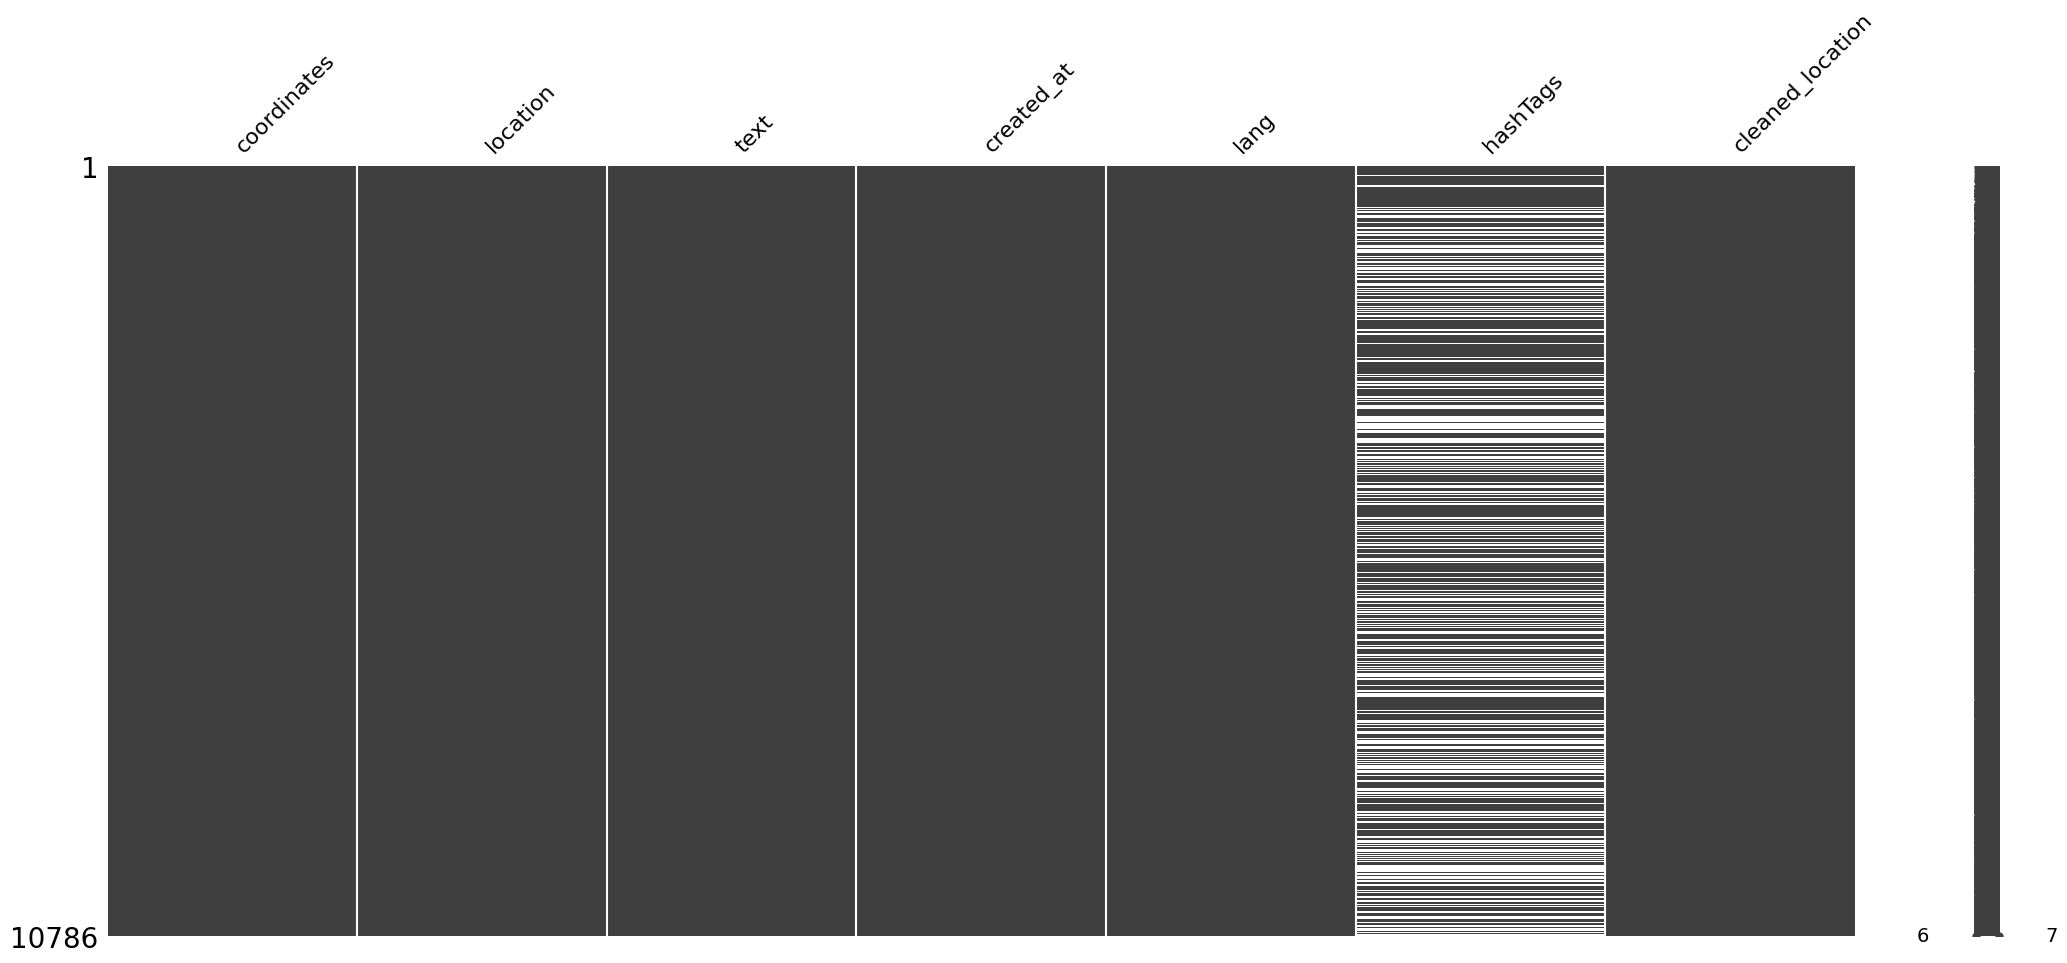

In [1]:
import pandas as pd
import missingno as msno

df = pd.read_csv('./data/geo_Tennis_tweets.csv')


#print("原始列名:", df.columns.tolist())
#df = df.iloc[:, :-1]

print("删除后的列名:", df.columns.tolist())
print("数据形状:", df.shape)

df
msno.matrix(df)

## Check Statistical of language and preprocessing before translating

=== 语言分布统计 ===
总推文数: 10786

前10种语言分布:
  en: 7,329 (67.95%)
  es: 1,031 (9.56%)
  it: 530 (4.91%)
  fr: 457 (4.24%)
  und: 419 (3.88%)
  da: 239 (2.22%)
  de: 222 (2.06%)
  nl: 172 (1.59%)
  pl: 61 (0.57%)
  pt: 53 (0.49%)
  sv: 44 (0.41%)
  no: 41 (0.38%)

开始清理文本...


清理文本: 100%|██████████| 10786/10786 [00:00<00:00, 176475.86it/s]


文本清理完成!
平均减少字符数: 17.77
平均减少比例: 20.25%

前20个常见词汇:
  wimbledon: 4570
  federer: 2458
  tennis: 1236
  roger: 1013
  wimbledonfinal: 884
  cilic: 838
  wimbledon2017: 706
  this: 626


,coordinates,location,text,created_at,lang,hashTags,cleaned_location,cleaned_text
0,"38.3436365,-0.4881708","Alicante, Comunidad Valenciana",Alucinando como se está moviendo Garbiñe por l...,Sat Jul 15 14:19:06 +0000 2017,es,VamosGarbiñe Wimbledon,"Alicante, Comunidad Valenciana",Alucinando como se está moviendo Garbiñe por l...
1,"40.4167047,-3.7035825",Madrid,Vamos Muguruza queda poco! #WimbledonMovistar,Sat Jul 15 14:19:08 +0000 2017,es,WimbledonMovistar,Madrid,Vamos Muguruza queda poco! WimbledonMovistar
2,"42.34461,-3.70051",León - Burgos - Philippines,Enjoying #wimbledon final @ Varacafé https://t...,Sat Jul 15 14:19:09 +0000 2017,en,wimbledon,León - Burgos - Philippines,Enjoying wimbledon final Varacafé
3,"51.4893335,-0.1440551",London,It's a little like watching the Murray QF agai...,Sat Jul 15 14:19:10 +0000 2017,en,vamosGarbi Wimbledon,London,It's a little like watching the Murray QF agai...
4,"51.309559,-0.0557157","Warlingham,Surrey",@GarbiMuguruza must surely now have one hand 🤚...,Sat Jul 15 14:19:11 +0000 2017,en,Wimbledon,"Warlingham, Surrey",must surely now have one hand on the trophy W...
...,...,...,...,...,...,...,...,...
10781,"51.48522992,-3.19610325",Caerdydd Cardiff,“@Diamond_Tennis Defnyddiwch cod treganna2017...,Tue Jul 18 22:56:55 +0000 2017,cy,NaN,Caerdydd Cardiff,Defnyddiwch cod treganna2017 i ennill ddisgown...
10782,"45.1941383,9.8663353",grumello cremonese cr,"""La forza è anche quella di saper armonizzare ...",Tue Jul 18 22:58:43 +0000 2017,it,Federer,grumello cremonese cr,"""La forza è anche quella di saper armonizzare ..."
10783,"42.6384261,12.674297",Italia,"Non saprei, ma so che gli piace giocare a tenn...",Tue Jul 18 23:19:11 +0000 2017,it,NaN,Italia,"Non saprei, ma so che gli piace giocare a tennis"
10784,"42.6384261,12.674297",Italia,Tennis https://t.co/gOSJO08n5C,Tue Jul 18 23:22:33 +0000 2017,is,NaN,Italia,Tennis


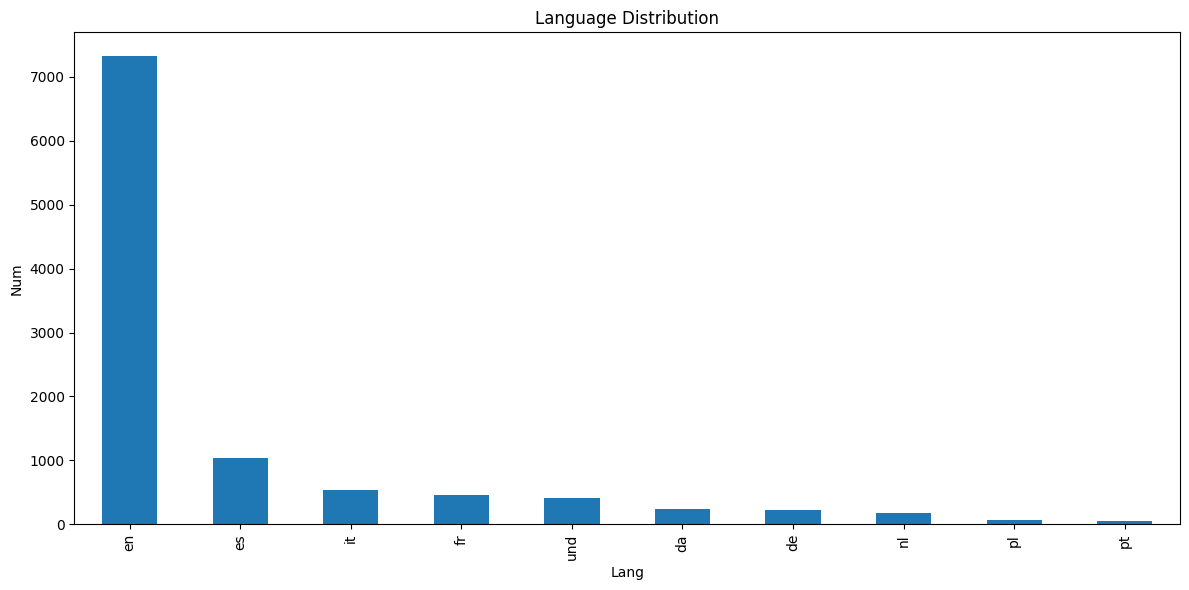

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

def clean_and_analyze_tweets(df):
    # 1. 对语言进行统计
    lang_counts = df['lang'].value_counts()
    
    print("=== 语言分布统计 ===")
    print(f"总推文数: {len(df)}")
    print("\n前10种语言分布:")
    for lang, count in lang_counts.head(12).items():
        percentage = count / len(df) * 100
        print(f"  {lang}: {count:,} ({percentage:.2f}%)")
    
    # 2. 可视化语言分布
    plt.figure(figsize=(12, 6))
    lang_counts.head(10).plot(kind='bar')
    plt.title('Language Distribution')
    plt.xlabel('Lang')
    plt.ylabel('Num')
    plt.tight_layout()
    #plt.savefig('language_distribution.png')
    #print(f"语言分布图已保存为 'language_distribution.png'")
    
    # 3. 清理文本
    print("\n开始清理文本...")
    
    # 定义清理函数
    def clean_text(text):
        if pd.isna(text) or text == '':
            return ''
            
        # 移除URL
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[^\w\s.,!?;:\'\"()-]', '', text)
        
        return text.strip()
    
    tqdm.pandas(desc="清理文本")
    df['cleaned_text'] = df['text'].progress_apply(clean_text)
    
    # 4. 统计清理前后文本长度
    df['original_length'] = df['text'].str.len()
    df['cleaned_length'] = df['cleaned_text'].str.len()
    df['length_reduction'] = df['original_length'] - df['cleaned_length']
    
    avg_reduction = df['length_reduction'].mean()
    avg_reduction_pct = (df['length_reduction'] / df['original_length']).mean() * 100
    
    print(f"\n文本清理完成!")
    print(f"平均减少字符数: {avg_reduction:.2f}")
    print(f"平均减少比例: {avg_reduction_pct:.2f}%")
    
    # 5. 分析常见词汇（可选）
    all_words = ' '.join(df['cleaned_text'].dropna()).lower().split()
    word_counts = Counter(all_words)
    
    print("\n前20个常见词汇:")
    for word, count in word_counts.most_common(20):
        if len(word) > 3:
            print(f"  {word}: {count}")
    
    return df


cleaned_df = clean_and_analyze_tweets(df)
cleaned_df = cleaned_df.iloc[:, :-3]
cleaned_df.to_csv('./data/Tennis_cleaned_text.csv', index=False, encoding='utf-8')
cleaned_df

## Use Model to translate

In [4]:
import pandas as pd

cleaned_df = pd.read_csv('./data/Tennis_cleaned_text.csv')
supported_languages = {
        'en': 'English',
        'es': 'Spanish',
        'it': 'Italian',
        'fr': 'French',
        #'und': 'Undefined',
        'pt': 'Portuguese',
        'de': 'German',
        'nl': 'Dutch',
        #'in': 'Indonesian',
        'sv': 'Swedish',
        'pl': 'Polish',
        'tr': 'Turkish',
        'da': 'Danish'
    }
lang_to_model = {
        'es': 'Helsinki-NLP/opus-mt-es-en',
        'it': 'Helsinki-NLP/opus-mt-it-en',
        'fr': 'Helsinki-NLP/opus-mt-fr-en',
        'pt': 'Helsinki-NLP/opus-mt-pt-en',
        'de': 'Helsinki-NLP/opus-mt-de-en',
        'nl': 'Helsinki-NLP/opus-mt-nl-en',
        'sv': 'Helsinki-NLP/opus-mt-sv-en',
        'pl': 'Helsinki-NLP/opus-mt-pl-en',
        'tr': 'Helsinki-NLP/opus-mt-tr-en',
        'da': 'Helsinki-NLP/opus-mt-da-en'
    }
cleaned_df = cleaned_df[cleaned_df['lang'].isin(supported_languages.keys())]
cleaned_df

,coordinates,location,text,created_at,lang,hashTags,cleaned_location,cleaned_text
0,"38.3436365,-0.4881708","Alicante, Comunidad Valenciana",Alucinando como se está moviendo Garbiñe por l...,Sat Jul 15 14:19:06 +0000 2017,es,VamosGarbiñe Wimbledon,"Alicante, Comunidad Valenciana",Alucinando como se está moviendo Garbiñe por l...
1,"40.4167047,-3.7035825",Madrid,Vamos Muguruza queda poco! #WimbledonMovistar,Sat Jul 15 14:19:08 +0000 2017,es,WimbledonMovistar,Madrid,Vamos Muguruza queda poco! WimbledonMovistar
2,"42.34461,-3.70051",León - Burgos - Philippines,Enjoying #wimbledon final @ Varacafé https://t...,Sat Jul 15 14:19:09 +0000 2017,en,wimbledon,León - Burgos - Philippines,Enjoying wimbledon final Varacafé
3,"51.4893335,-0.1440551",London,It's a little like watching the Murray QF agai...,Sat Jul 15 14:19:10 +0000 2017,en,vamosGarbi Wimbledon,London,It's a little like watching the Murray QF agai...
4,"51.309559,-0.0557157","Warlingham,Surrey",@GarbiMuguruza must surely now have one hand 🤚...,Sat Jul 15 14:19:11 +0000 2017,en,Wimbledon,"Warlingham, Surrey",must surely now have one hand on the trophy W...
...,...,...,...,...,...,...,...,...
10779,"53.4071991,-2.99168",Liverpool,Is I normal to sweat this much whilst playing ...,Tue Jul 18 22:56:13 +0000 2017,en,NaN,Liverpool,Is I normal to sweat this much whilst playing ...
10780,"51.4194864,-0.2056131",London,Ahh summer isn't here until you have a Pina Co...,Tue Jul 18 22:56:37 +0000 2017,en,NaN,London,Ahh summer isn't here until you have a Pina Co...
10782,"45.1941383,9.8663353",grumello cremonese cr,"""La forza è anche quella di saper armonizzare ...",Tue Jul 18 22:58:43 +0000 2017,it,Federer,grumello cremonese cr,"""La forza è anche quella di saper armonizzare ..."
10783,"42.6384261,12.674297",Italia,"Non saprei, ma so che gli piace giocare a tenn...",Tue Jul 18 23:19:11 +0000 2017,it,NaN,Italia,"Non saprei, ma so che gli piace giocare a tennis"


In [5]:
from transformers import MarianMTModel, MarianTokenizer
import pandas as pd
from tqdm import tqdm
import torch
import os

def translate_all_to_english(df, models_dir="./cache"):
    """
    将DataFrame中特定语言的文本翻译为英语
    
    参数:
    df: 包含text和lang列的DataFrame
    source_lang: 源语言代码，如'fr'表示法语
    
    返回:
    包含翻译列的DataFrame
    """
    os.makedirs(models_dir, exist_ok=True)
    
    lang_code_map = {
        'es': 'Helsinki-NLP/opus-mt-es-en',  # 西班牙语
        'it': 'Helsinki-NLP/opus-mt-it-en',  # 意大利语
        'fr': 'Helsinki-NLP/opus-mt-fr-en',  # 法语
        'pt': 'Helsinki-NLP/opus-mt-mul-en',  # 葡萄牙语
        'de': 'Helsinki-NLP/opus-mt-de-en',  # 德语
        'nl': 'Helsinki-NLP/opus-mt-mul-en',  # 荷兰语
        'sv': 'Helsinki-NLP/opus-mt-sv-en',  # 瑞典语
        'pl': 'Helsinki-NLP/opus-mt-pl-en',  # 波兰语
        'tr': 'Helsinki-NLP/opus-mt-tr-en',  # 土耳其语
        'da': 'Helsinki-NLP/opus-mt-da-en'
    }
    
    # 创建翻译列
    if 'translated_text' not in df.columns:
        df['translated_text'] = df['cleaned_text']
    
    # 统计各语言数量
    lang_counts = df['lang'].value_counts()
    print("语言分布:")
    for lang, count in lang_counts.items():
        status = "支持" if lang == 'en' or lang in lang_code_map else "不支持"
        print(f"  {lang}: {count} 条 ({status}翻译)")
    
    # 加载模型字典
    models = {}
    tokenizers = {}
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"使用设备: {device}")
    
    # 按语言处理
    for lang in tqdm(df['lang'].unique(), desc="处理语言"):
        # 跳过英语和不支持的语言
        if lang == 'en' or lang not in lang_code_map:
            continue
            
        # 计算该语言的行数
        lang_count = len(df[df['lang'] == lang])
        print(f"\n处理{lang}语言 ({lang_count}条文本)")
        model_name = lang_code_map[lang]
        model_path = os.path.join(models_dir, lang + '_to_en')
        
        # 检查模型是否已存在本地
        if os.path.exists(model_path):
            print(f"从本地加载模型: {model_path}")
            tokenizers[lang] = MarianTokenizer.from_pretrained(model_path)
            models[lang] = MarianMTModel.from_pretrained(model_path)
        else:
            print(f"从Hugging Face下载模型: {model_name}")
            tokenizers[lang] = MarianTokenizer.from_pretrained(model_name, cache_dir=models_dir)
            models[lang] = MarianMTModel.from_pretrained(model_name, cache_dir=models_dir)
            print(f"保存模型到: {model_path}")
            tokenizers[lang].save_pretrained(model_path)
            models[lang].save_pretrained(model_path)
        
        # 将模型移至设备
        models[lang].to(device)
        
        # 筛选该语言的行
        lang_mask = df['lang'] == lang
        lang_indices = df[lang_mask].index
        
        batch_size = 8  # 根据GPU内存调整
        for i in tqdm(range(0, len(lang_indices), batch_size), desc=f"翻译{lang}语言"):
            batch_indices = lang_indices[i:i+batch_size]
            
            for idx in batch_indices:
                text = df.loc[idx, 'text']
                if pd.isna(text) or text.strip() == '':
                    continue
                    
                try:
                    inputs = tokenizers[lang](text, return_tensors="pt", padding=True, truncation=True, max_length=512)
                    inputs = {k: v.to(device) for k, v in inputs.items()}
                    with torch.no_grad():
                        outputs = models[lang].generate(**inputs, max_length=512)
                    translated_text = tokenizers[lang].decode(outputs[0], skip_special_tokens=True)
                    df.at[idx, 'translated_text'] = translated_text
                    
                except Exception as e:
                    print(f"翻译错误 (ID: {idx}): {e}")
        
        if device.type == 'cuda':
            del models[lang]
            del tokenizers[lang]
            torch.cuda.empty_cache()
    
    # 计算有多少行被翻译了
    translated_count = sum((df['lang'] != 'en') & (df['lang'].isin(lang_code_map)))
    print(f"\n翻译完成! 共翻译了 {translated_count} 条文本")
    
    return df

en_df = translate_all_to_english(cleaned_df)
en_df.to_csv('./data/en_Tennis.csv', index=False, encoding='UTF-8')
en_df

语言分布:
  en: 7329 条 (支持翻译)
  es: 1031 条 (支持翻译)
  it: 530 条 (支持翻译)
  fr: 457 条 (支持翻译)
  da: 239 条 (支持翻译)
  de: 222 条 (支持翻译)
  nl: 172 条 (支持翻译)
  pl: 61 条 (支持翻译)
  pt: 53 条 (支持翻译)
  sv: 44 条 (支持翻译)
  tr: 26 条 (支持翻译)
使用设备: cuda


处理语言:   0%|          | 0/11 [00:00<?, ?it/s]


处理es语言 (1031条文本)
从本地加载模型: ./cache/es_to_en


处理语言:   9%|▉         | 1/11 [01:48<18:08, 108.85s/it]


处理de语言 (222条文本)
从本地加载模型: ./cache/de_to_en


处理语言:  27%|██▋       | 3/11 [02:10<04:48, 36.06s/it] 


处理it语言 (530条文本)
从本地加载模型: ./cache/it_to_en


处理语言:  36%|███▋      | 4/11 [03:13<05:19, 45.62s/it]


处理pl语言 (61条文本)
从本地加载模型: ./cache/pl_to_en


处理语言:  45%|████▌     | 5/11 [03:19<03:15, 32.54s/it]


处理pt语言 (53条文本)
从本地加载模型: ./cache/pt_to_en


处理语言:  55%|█████▍    | 6/11 [03:25<01:59, 23.87s/it]


处理nl语言 (172条文本)
从本地加载模型: ./cache/nl_to_en


处理语言:  64%|██████▎   | 7/11 [03:44<01:29, 22.43s/it]


处理fr语言 (457条文本)
从本地加载模型: ./cache/fr_to_en


处理语言:  73%|███████▎  | 8/11 [04:26<01:25, 28.48s/it]


处理sv语言 (44条文本)
从本地加载模型: ./cache/sv_to_en


处理语言:  82%|████████▏ | 9/11 [04:31<00:42, 21.39s/it]


处理da语言 (239条文本)
从Hugging Face下载模型: Helsinki-NLP/opus-mt-da-en


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/820k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/788k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/300M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

保存模型到: ./cache/da_to_en


/home/ys_tum/miniconda3/envs/carto/lib/python3.8/site-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[58929]]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


model.safetensors:   0%|          | 0.00/300M [00:00<?, ?B/s]

处理语言:  91%|█████████ | 10/11 [06:09<00:44, 44.76s/it]


处理tr语言 (26条文本)
从本地加载模型: ./cache/tr_to_en


处理语言: 100%|██████████| 11/11 [06:13<00:00, 33.92s/it]


翻译完成! 共翻译了 2835 条文本


,coordinates,location,text,created_at,lang,hashTags,cleaned_location,cleaned_text,translated_text
0,"38.3436365,-0.4881708","Alicante, Comunidad Valenciana",Alucinando como se está moviendo Garbiñe por l...,Sat Jul 15 14:19:06 +0000 2017,es,VamosGarbiñe Wimbledon,"Alicante, Comunidad Valenciana",Alucinando como se está moviendo Garbiñe por l...,Hallucinating how Garbiñe is moving along the ...
1,"40.4167047,-3.7035825",Madrid,Vamos Muguruza queda poco! #WimbledonMovistar,Sat Jul 15 14:19:08 +0000 2017,es,WimbledonMovistar,Madrid,Vamos Muguruza queda poco! WimbledonMovistar,Come on Muguruza is little left! #WimbledonMov...
2,"42.34461,-3.70051",León - Burgos - Philippines,Enjoying #wimbledon final @ Varacafé https://t...,Sat Jul 15 14:19:09 +0000 2017,en,wimbledon,León - Burgos - Philippines,Enjoying wimbledon final Varacafé,Enjoying wimbledon final Varacafé
3,"51.4893335,-0.1440551",London,It's a little like watching the Murray QF agai...,Sat Jul 15 14:19:10 +0000 2017,en,vamosGarbi Wimbledon,London,It's a little like watching the Murray QF agai...,It's a little like watching the Murray QF agai...
4,"51.309559,-0.0557157","Warlingham,Surrey",@GarbiMuguruza must surely now have one hand 🤚...,Sat Jul 15 14:19:11 +0000 2017,en,Wimbledon,"Warlingham, Surrey",must surely now have one hand on the trophy W...,must surely now have one hand on the trophy W...
...,...,...,...,...,...,...,...,...,...
10779,"53.4071991,-2.99168",Liverpool,Is I normal to sweat this much whilst playing ...,Tue Jul 18 22:56:13 +0000 2017,en,NaN,Liverpool,Is I normal to sweat this much whilst playing ...,Is I normal to sweat this much whilst playing ...
10780,"51.4194864,-0.2056131",London,Ahh summer isn't here until you have a Pina Co...,Tue Jul 18 22:56:37 +0000 2017,en,NaN,London,Ahh summer isn't here until you have a Pina Co...,Ahh summer isn't here until you have a Pina Co...
10782,"45.1941383,9.8663353",grumello cremonese cr,"""La forza è anche quella di saper armonizzare ...",Tue Jul 18 22:58:43 +0000 2017,it,Federer,grumello cremonese cr,"""La forza è anche quella di saper armonizzare ...","""The strength is also to know how to harmonize..."
10783,"42.6384261,12.674297",Italia,"Non saprei, ma so che gli piace giocare a tenn...",Tue Jul 18 23:19:11 +0000 2017,it,NaN,Italia,"Non saprei, ma so che gli piace giocare a tennis","I don't know, but I know he likes to play tenn..."


                 coordinates                  location  \
1      51.4893335,-0.1440551                    London   
2       41.5629623,2.0100492                  Terrassa   
3      52.4796992,-1.9026911             Birmingham UK   
4        36.674979,-4.495675        Churriana (Málaga)   
6       41.0679423,1.0657579  cambrils,tarragona,spain   
...                      ...                       ...   
36141  40.8880079,-4.4720127                 muñopedro   
36142  40.4167047,-3.7035825            Madrid, España   
36143  34.4373616,35.8348551            طرابلس ، لبنان   
36144        51.4853,-3.1867         Pencoed Wales U.K   
36145  38.7077507,-9.1365919                    Lisboa   

                                                    text  \
1      @AaronBastani Just a thought but if we are not...   
2      #ForzaJuve Cada 7 años gana un italiano. A la ...   
3      Corbyn dropping some truth bombs instead of Nu...   
4      #ForzaJuve Cada 7 años gana un italiano. A la ...   
6  

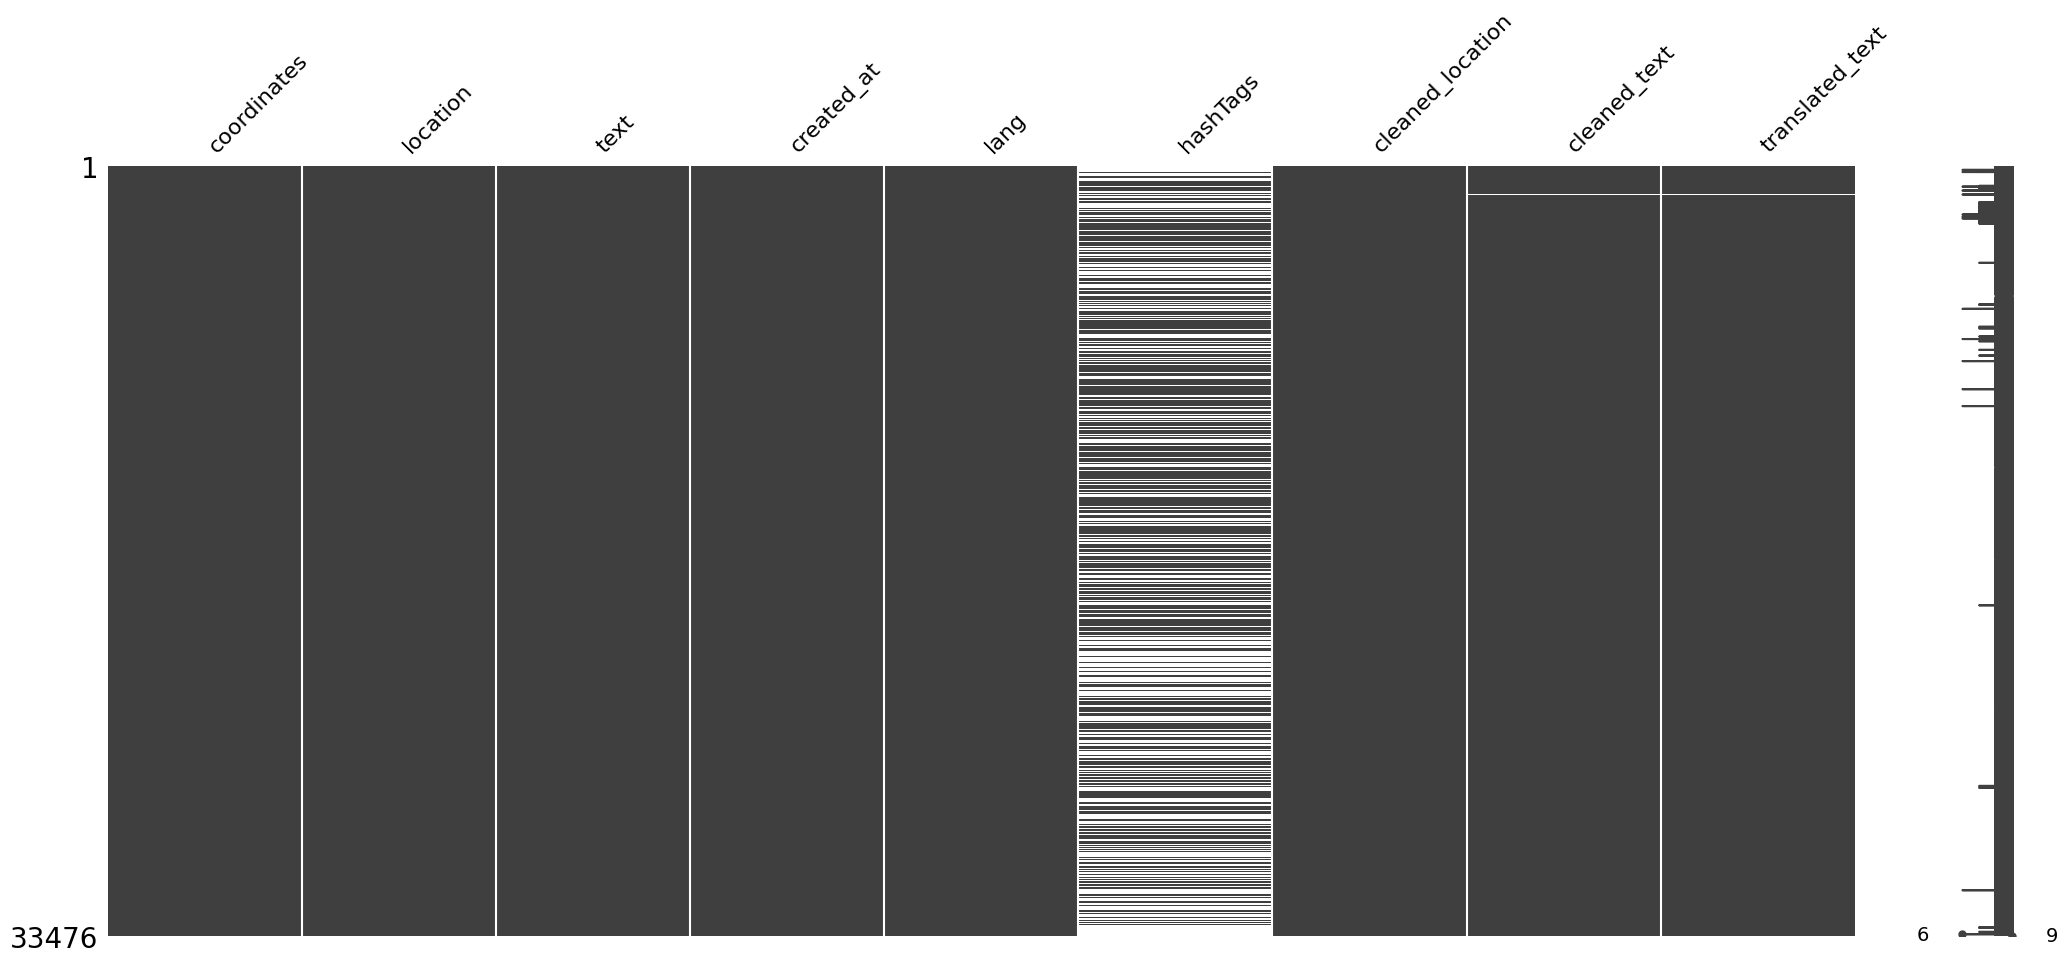

In [7]:
import missingno as msno
msno.matrix(en_df)
print(en_df)

## Use Deepl to translate other lang to Eng

In [5]:
import pandas as pd
import requests
from tqdm import tqdm
import time

def translate_non_english_tweets(df, api_key, batch_size=10):
    """
    使用DeepL API将非英语tweets翻译为英语
    
    参数:
    df: 包含text和lang列的DataFrame
    api_key: DeepL API密钥
    batch_size: 批处理大小,避免API限制
    
    返回:
    添加了翻译列的DataFrame
    """
    if 'translated_text' not in df.columns:
        df['translated_text'] = df['cleaned_text']
    non_english_mask = df['lang'] != 'en'
    non_english_df = df[non_english_mask]
    print(f"需要翻译的tweets数量: {len(non_english_df)}")
    
    url = "https://api-free.deepl.com/v2/translate"  # 免费版API
    # 如果使用专业版: url = "https://api.deepl.com/v2/translate"
    
    success_count = 0
    error_count = 0
    
    for i in tqdm(range(0, len(non_english_df), batch_size), desc="翻译进度"):
        batch = non_english_df.iloc[i:i+batch_size]
        
        for idx, row in batch.iterrows():
            if pd.isna(row['cleaned_text']) or row['cleaned_text'].strip() == '':
                continue
                
            try:
                params = {
                    "auth_key": api_key,
                    "text": row['cleaned_text'],
                    "target_lang": "EN"
                }
                
                response = requests.post(url, data=params)
                if response.status_code == 200:
                    result = response.json()
                    if result["translations"]:
                        translated_text = result["translations"][0]["text"]
                        df.at[idx, 'translated_text'] = translated_text
                        success_count += 1
                else:
                    print(f"翻译错误 (ID: {idx}): HTTP {response.status_code}")
                    error_count += 1
            except Exception as e:
                print(f"处理错误 (ID: {idx}): {e}")
                error_count += 1
            
            time.sleep(0.5)
        
        if (i // batch_size) % 5 == 0 and i > 0:
            print(f"完成了 {i+batch_size} 条翻译, 暂停5秒...")
            time.sleep(5)
    
    # 打印统计信息
    print(f"\n翻译完成!")
    print(f"成功翻译: {success_count}")
    print(f"翻译错误: {error_count}")
    print(f"成功率: {success_count/(success_count+error_count)*100:.2f}%")
    
    return df


api_key = "4dfff2ff-ef72-047b-a8b4-17ae17b33f84:fx"
cleaned_df = translate_non_english_tweets(cleaned_df, api_key)

需要翻译的tweets数量: 21242


翻译进度:   0%|          | 5/2125 [00:47<5:37:09,  9.54s/it]


KeyboardInterrupt: 